In [1]:
#GOAL: predict the price of sale for used cars(regression analysis task) using dataset downloaded from kaggle.com

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('car_data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape #301 rows x 9 columns

(301, 9)

In [10]:
#categorical features, unique classes
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [11]:
#for each column(feature) check to see how many null or na values there is
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
#get basic descriptive stats on our table(dataframe)
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
#drop the car model columns, we exclude this column since our model works with numerical data, cant encode model name as #
df = df.drop(columns=['Car_Name'], axis=1)

In [14]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
#we will derive a few columns, current_year, and years_old = curr_year - year
df['Current_Year'] = 2021

In [19]:
df['Years_Old'] = df['Current_Year'] - df['Year']

In [24]:
#we no longer need the year, current_year feature since years_old is adequeate
df = df.drop(columns=['Year', 'Current_Year'], axis=1)

In [26]:
#one-hot encode the categorical features
df = pd.get_dummies(df, drop_first=True)

In [27]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [30]:
#check the correletion between every pair of features
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Years_Old,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


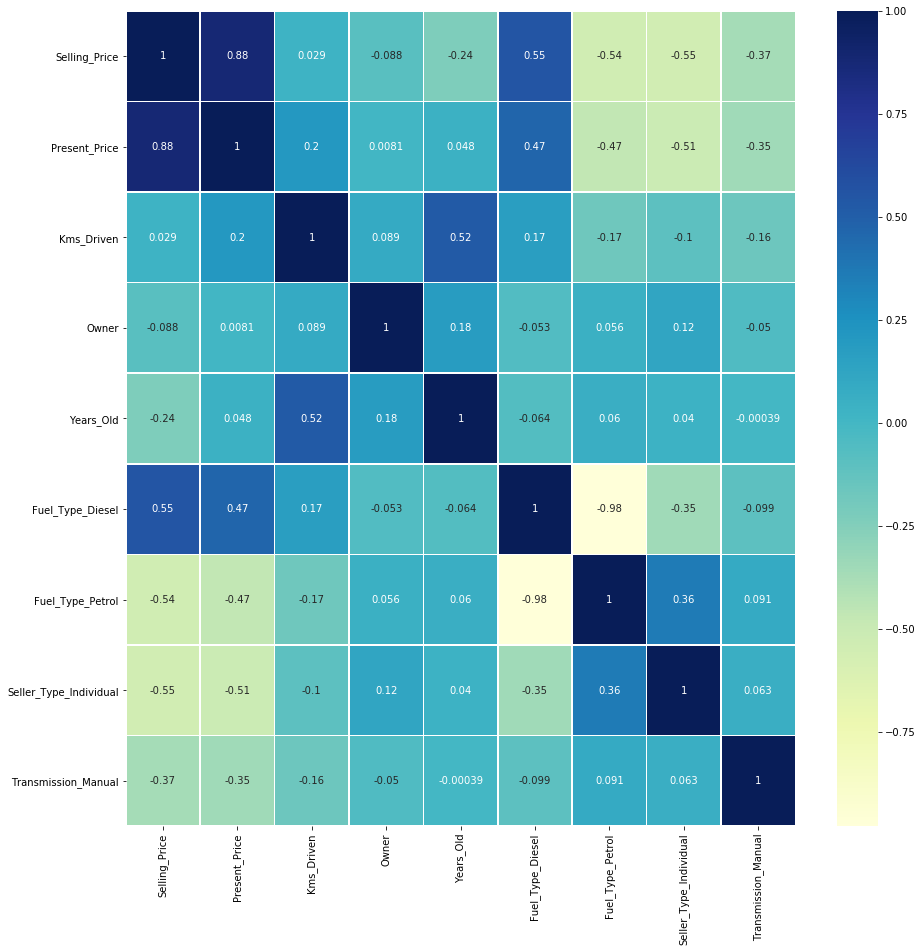

In [37]:
#visualize the correlation table using seaborn library
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), linewidths=.5, cmap='YlGnBu', annot=True)

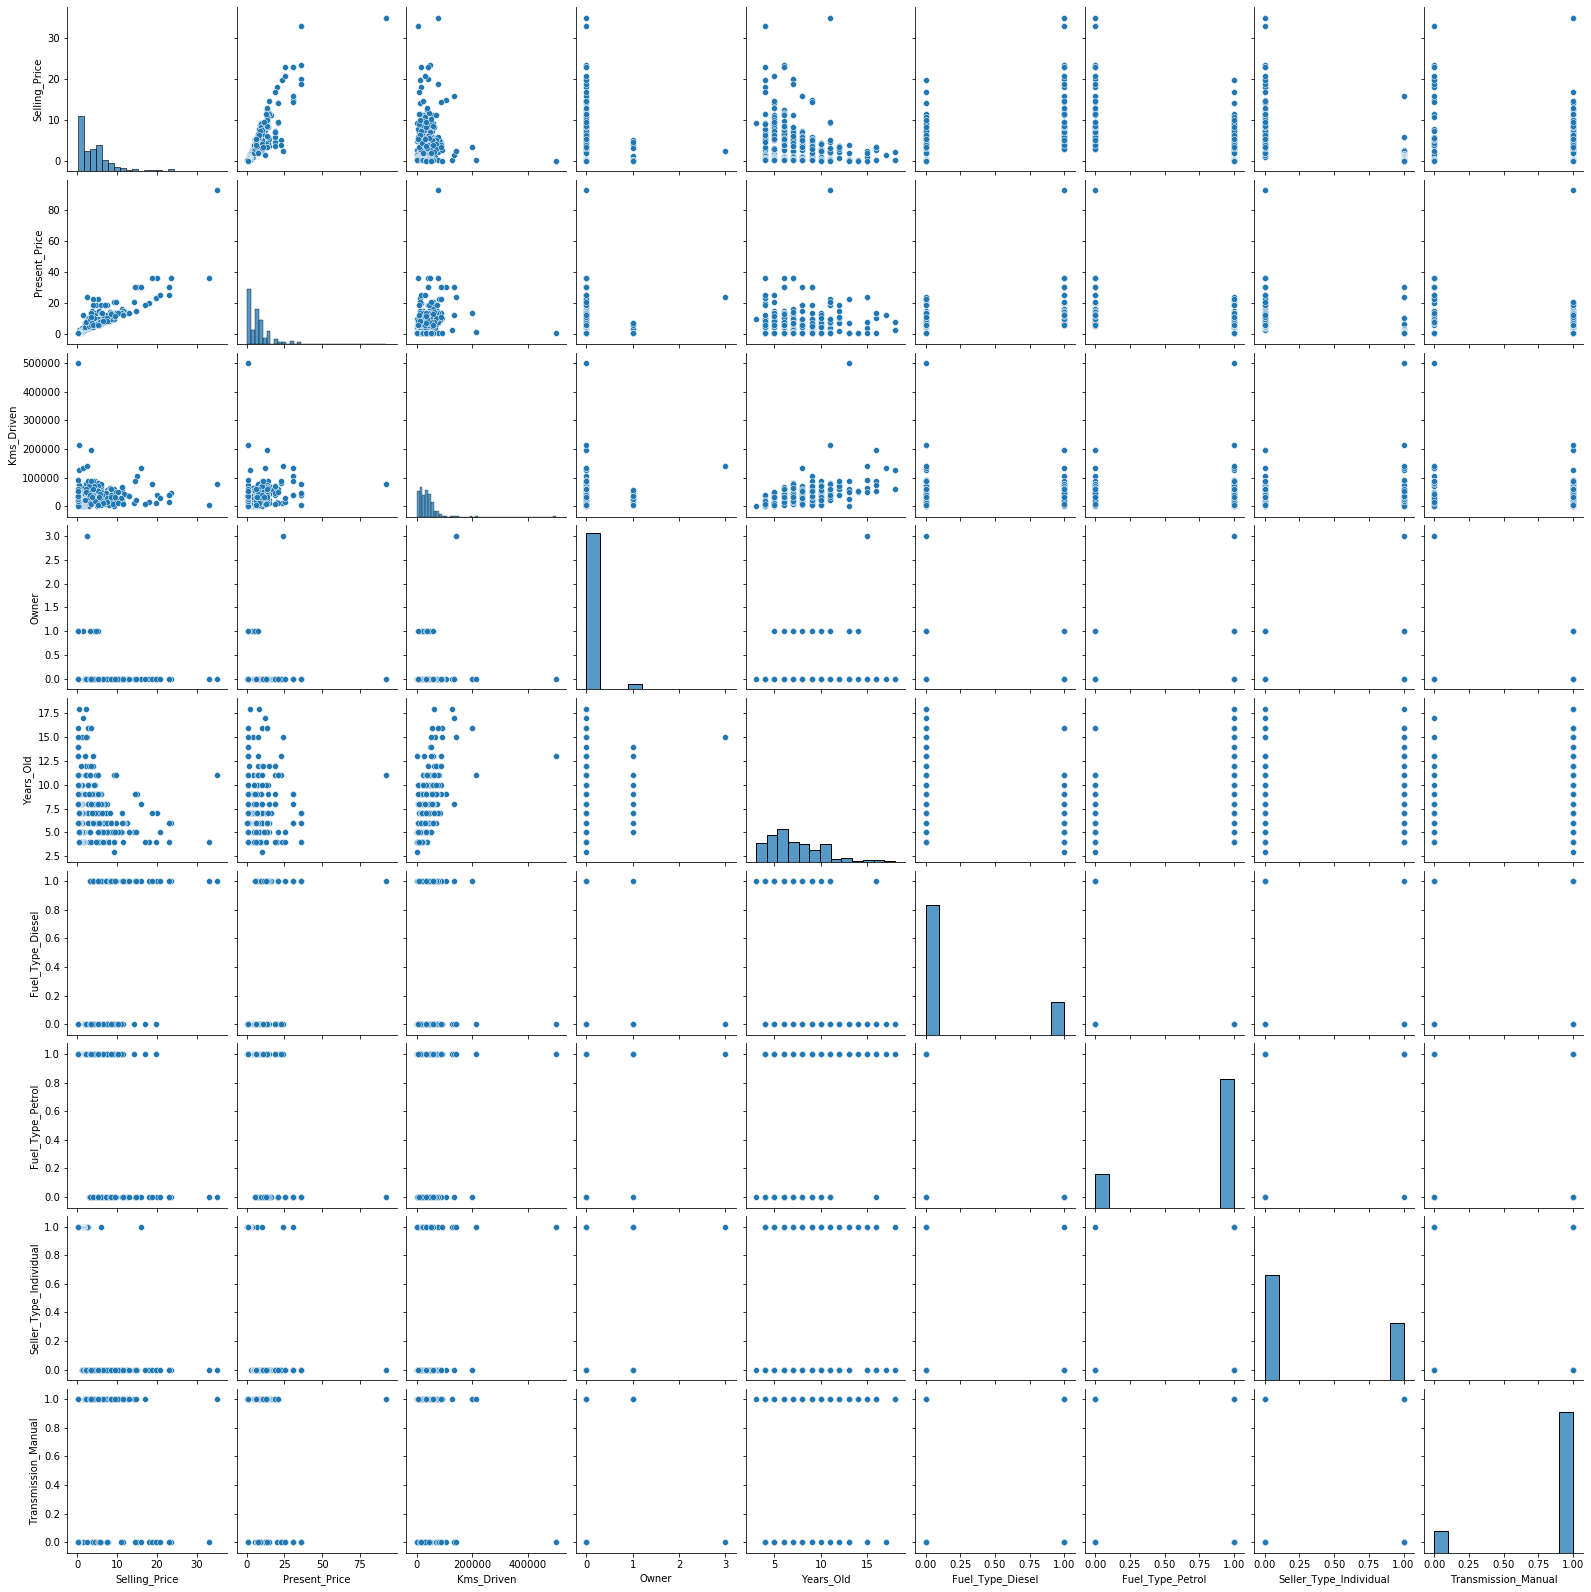

In [34]:
#more exploratory data analysis (EDA)
sns.pairplot(df)

In [40]:
#Column: Selling_Price is our target output(dependant variable) we are trying to predict with regression analysis
#extract the Selling_Price column from the dataframe into its own series object(column vector)

y = df['Selling_Price']
y.shape

(301,)

In [44]:
#Our predictors(X or independent variables) is everything except the dependant variables
X = df.drop(columns=['Selling_Price'], axis=1)
X.shape

(301, 8)

In [47]:
#Evaluate the feature importance 
from sklearn.ensemble import ExtraTreesRegressor

In [48]:
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [52]:
my_features = X.columns

In [55]:
for feature, score in zip(my_features, model.feature_importances_):
    print(f"{feature}: {score}")

Present_Price: 0.38209542273858865
Kms_Driven: 0.04357506855189083
Owner: 0.0008193255952913755
Years_Old: 0.07646746569054555
Fuel_Type_Diesel: 0.22384445861289928
Fuel_Type_Petrol: 0.011623184282367822
Seller_Type_Individual: 0.1260367351351787
Transmission_Manual: 0.13553833939323776


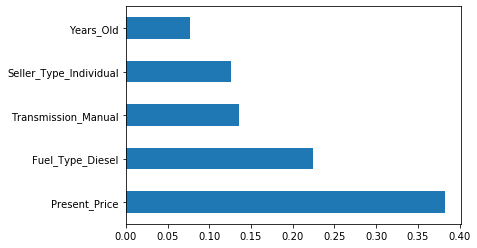

In [56]:
#Plot the top 5 most important features in a bar style graph
feat_importances = pd.Series(model.feature_importances_, index=my_features)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [57]:
#perform a train test split on our X, y variables
from sklearn.model_selection import train_test_split

#20% of our data goes to testing, 80% goes to training our model on training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
X_train.shape

(240, 8)

In [59]:
X_test.shape

(61, 8)

In [60]:
y_train.shape

(240,)

In [61]:
y_test.shape

(61,)

In [62]:
#Use a Random Forrest Regressor(ensemble technique)
#No feature scaling is required for decision trees

from sklearn.ensemble import RandomForestRegressor

In [64]:
rf_model = RandomForestRegressor(warm_start=True)

In [68]:
#Hyperparameter Tuning of RandomForestRegressor Model
from sklearn.metrics import mean_squared_error #use MSE for regression loss function

#find minimum # of weak learners(decision tree regressors) before overfitting

min_val_error = float("inf")
error_going_up = 0

for n_estimators in range(100, 1200):
    rf_model.n_estimators = n_estimators
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break

In [69]:
#optimal number of estimators
rf_model.n_estimators

116

In [74]:
#more hyperparameter tuning
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at each split
max_features = ['auto', 'sqrt']

#Maximum recursion depth of decision tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]

#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

#Minimum number of samples required at each lead node(prediction)
min_samples_leaf = [1, 2, 5, 10]

In [72]:
#Use the randomized search cross validation to find optimal hyperparameters

In [75]:
random_grid = {
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

random_grid

{'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [89]:
#RandomSearchCV SELECT THE BEST HYPER PARAMETERS FOR US
rf_model = RandomForestRegressor(n_estimators=116)

In [90]:
rf_random_cv = RandomizedSearchCV(estimator = rf_model, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, random_state=42, n_jobs=-1, verbose=2)

In [91]:
rf_random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=116,
                              

In [92]:
predictions = rf_random_cv.predict(X_test)

In [93]:
predictions

array([ 0.40746914, 11.30471432,  4.85465637,  0.23184103,  8.17295348,
        6.5895453 ,  1.09142483,  0.59669133,  0.45589888,  6.52631517,
        8.08376851,  1.03062106,  7.74257646,  0.46461788,  5.29736122,
        2.8081652 ,  1.12996845, 14.06018124,  0.46232273,  1.5109779 ,
        0.33393814,  7.9738413 ,  4.74148587,  2.81609334,  0.52470159,
        3.51866242,  5.2193543 ,  3.14210792,  1.16148559,  1.18282015,
        0.42042248, 10.04112743,  0.45063208,  2.70127035,  7.80747287,
        4.28427477,  5.81309726,  6.61548163,  2.58870023,  7.48927268,
        4.18229639,  3.33638328,  5.02717001,  0.54994865,  6.29532065,
        0.77919564,  8.55530702,  6.25567607,  2.98260211,  3.65773142,
        5.13757691,  1.45646117, 23.2805373 , 19.65453374,  6.57360558,
       10.0980951 ,  5.07271364,  8.78756277,  2.74405361,  6.9040702 ,
        0.24755884])

c:\users\mia\miniconda3\envs\tensor\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


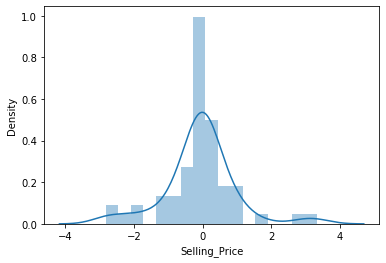

In [94]:
#plot using a distribution plot our predictions vs true outputs
sns.distplot(y_test-predictions)

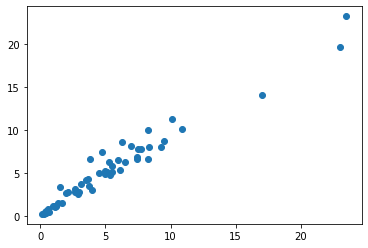

In [95]:
plt.scatter(y_test, predictions)

In [97]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)*1000

638.4834851176714

In [101]:
#SAVE OUR MODEL using Pickle Module
import pickle

#store the model in a .pkl(pickle) file in write bytes mode
file = open('random_forest_regression.pkl', 'wb')

pickle.dump(rf_random_cv, file)

In [103]:
file.close()